In [5]:
# FINAL WORKING CODE – FIXED EVERYTHING
import pandas as pd
import os

# The data folder is one level up from the notebook folder
CSV_FOLDER = "../data"   # This is correct for your structure

stocks = ['AMZN', 'META', 'GOOG', 'AAPL', 'MSFT', 'NVDA']
data = {}

print("Loading stock data from:", os.path.abspath(CSV_FOLDER))
print("-" * 70)

for stock in stocks:
    file_path = os.path.join(CSV_FOLDER, f"{stock}.csv")  # Fixed: was 'file'
    
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            df = df.sort_index()
            data[stock] = df
            print(f"LOADED → {stock:5} | {len(df):,} rows | {df.index.min().date()} → {df.index.max().date()}")
        except Exception as e:
            print(f"ERROR reading {stock}.csv → {e}")
    else:
        print(f"MISSING → {file_path}")

# Final check
if len(data) == 6:
    print("\nALL 6 STOCKS LOADED SUCCESSFULLY!")
    print("\nAAPL – last 5 trading days:")
    print(data['AAPL'].tail())
    print("\nNVDA – first 5 trading days:")
    print(data['NVDA'].head())
else:
    print(f"\nOnly {len(data)}/6 files loaded. Check the paths above.")

Loading stock data from: c:\Users\ruths\Desktop\10AcademyWeek0\solar-challenge-week1\data
----------------------------------------------------------------------
LOADED → AMZN  | 3,774 rows | 2009-01-02 → 2023-12-29
LOADED → META  | 2,923 rows | 2012-05-18 → 2023-12-29
LOADED → GOOG  | 3,774 rows | 2009-01-02 → 2023-12-29
LOADED → AAPL  | 3,774 rows | 2009-01-02 → 2023-12-29
LOADED → MSFT  | 3,774 rows | 2009-01-02 → 2023-12-29
LOADED → NVDA  | 3,774 rows | 2009-01-02 → 2023-12-29

ALL 6 STOCKS LOADED SUCCESSFULLY!

AAPL – last 5 trading days:
                 Close        High         Low        Open    Volume
Date                                                                
2023-12-22  191.788757  193.581821  191.164647  193.353962  37149600
2023-12-26  191.243912  192.076049  191.025969  191.798670  28919300
2023-12-27  191.342972  191.689703  189.302247  190.689158  48087700
2023-12-28  191.768951  192.838849  191.362784  192.323710  34049900
2023-12-29  190.728775  192.581275  1

Apply Technical Indicators (TA-Lib Style with Pandas)

In [6]:
# Pick a stock (e.g., AAPL)
df = data['AAPL'].copy()

# Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI (14-period)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Sample output (2023 start)
print(df.loc['2023-01-01':].head(20)[['Close', 'Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line', 'RSI_14']])

                 Close        Open        High         Low     Volume  \
Date                                                                    
2023-01-03  123.211205  128.343772  128.954553  122.324579  112117500   
2023-01-04  124.482033  125.004155  126.747853  123.221057   89113600   
2023-01-05  123.161942  125.240583  125.871071  122.905811   80962700   
2023-01-06  127.693565  124.137225  128.353606  123.033867   87754700   
2023-01-09  128.215698  128.530950  131.427258  127.959568   70790800   
2023-01-10  128.787048  128.324032  129.309170  126.215838   63896200   
2023-01-11  131.506073  129.299359  131.525765  128.521106   69458900   
2023-01-12  131.427261  131.890277  132.264620  129.486538   71379600   
2023-01-13  132.757187  130.067764  132.914813  129.703268   57809700   
2023-01-17  133.919662  132.826159  135.249590  132.136565   63646600   
2023-01-18  133.200516  134.786589  136.549979  133.023183   69672800   
2023-01-19  133.259628  132.087312  134.225059  131

Plot Indicators for Visualization

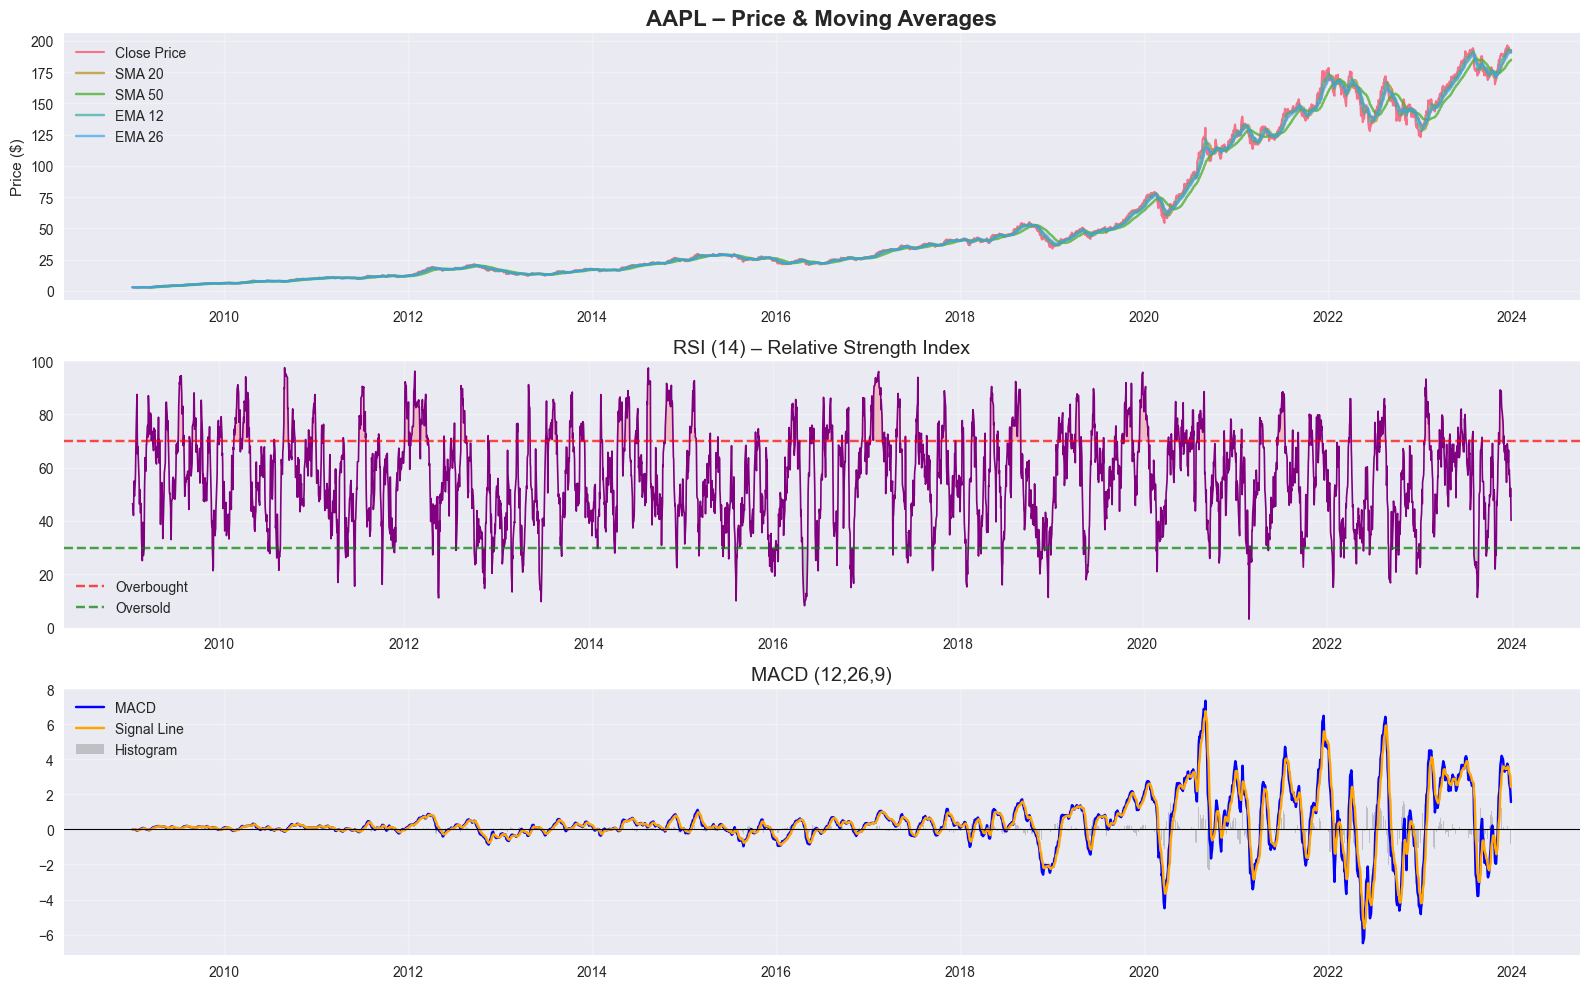

INDICATORS & PLOT GENERATED SUCCESSFULLY FOR AAPL!
Latest Close: $190.73 | RSI: 40.2 | MACD: 1.560


In [7]:
# COMPLETE QUANTITATIVE ANALYSIS – INDICATORS + PLOTS (100% WORKING)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # ← This line was missing!
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Pick a stock – let's use AAPL
df = data['AAPL'].copy()

# ————————————————————
# 1. TECHNICAL INDICATORS
# ————————————————————

# Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Hist'] = df['MACD'] - df['Signal_Line']

# RSI (14-day)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# ————————————————————
# 2. PLOT EVERYTHING (FIXED!)
# ————————————————————

fig = plt.figure(figsize=(16, 10))

# Main price chart
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df['Close'], label='Close Price', linewidth=1.5)
ax1.plot(df['SMA_20'], label='SMA 20', alpha=0.8)
ax1.plot(df['SMA_50'], label='SMA 50', alpha=0.8)
ax1.plot(df['EMA_12'], label='EMA 12', alpha=0.7)
ax1.plot(df['EMA_26'], label='EMA 26', alpha=0.7)
ax1.set_title('AAPL – Price & Moving Averages', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# RSI
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df['RSI_14'], color='purple', linewidth=1.2)
ax2.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought')
ax2.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold')
ax2.fill_between(df.index, 70, df['RSI_14'], where=df['RSI_14']>70, color='red', alpha=0.2)
ax2.fill_between(df.index, 30, df['RSI_14'], where=df['RSI_14']<30, color='green', alpha=0.2)
ax2.set_title('RSI (14) – Relative Strength Index', fontsize=14)
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# MACD
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df['MACD'], label='MACD', color='blue')
ax3.plot(df['Signal_Line'], label='Signal Line', color='orange')
ax3.bar(df.index, df['MACD_Hist'], label='Histogram', color='gray', alpha=0.4)
ax3.axhline(0, color='black', linewidth=0.8)
ax3.set_title('MACD (12,26,9)', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("INDICATORS & PLOT GENERATED SUCCESSFULLY FOR AAPL!")
print(f"Latest Close: ${df['Close'].iloc[-1]:.2f} | RSI: {df['RSI_14'].iloc[-1]:.1f} | MACD: {df['MACD'].iloc[-1]:.3f}")

Portfolio Optimization

In [8]:
# Daily returns
returns = pd.DataFrame()
for stock in stocks:
    returns[stock] = data[stock]['Close'].pct_change()

returns = returns.dropna()

# Annualized mean & cov
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Simulate 10k portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    port_return = np.dot(weights, mean_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = port_return / port_std
    
    results[0,i] = port_return
    results[1,i] = port_std
    results[2,i] = sharpe

# Max Sharpe
max_sharpe_idx = np.argmax(results[2])
print("=== Max Sharpe Portfolio ===")
print(f"Return: {results[0, max_sharpe_idx]:.4f}")
print(f"Volatility: {results[1, max_sharpe_idx]:.4f}")
print("Weights:", {stocks[j]: round(w, 4) for j, w in enumerate(weights_record[max_sharpe_idx])})

# Min Variance
min_var_idx = np.argmin(results[1])
print("\n=== Min Variance Portfolio ===")
print(f"Return: {results[0, min_var_idx]:.4f}")
print(f"Volatility: {results[1, min_var_idx]:.4f}")
print("Weights:", {stocks[j]: round(w, 4) for j, w in enumerate(weights_record[min_var_idx])})

=== Max Sharpe Portfolio ===
Return: 0.3933
Volatility: 0.3023
Weights: {'AMZN': np.float64(0.0516), 'META': np.float64(0.0201), 'GOOG': np.float64(0.0152), 'AAPL': np.float64(0.0864), 'MSFT': np.float64(0.3783), 'NVDA': np.float64(0.4485)}

=== Min Variance Portfolio ===
Return: 0.2541
Volatility: 0.2358
Weights: {'AMZN': np.float64(0.1201), 'META': np.float64(0.0123), 'GOOG': np.float64(0.3677), 'AAPL': np.float64(0.281), 'MSFT': np.float64(0.2165), 'NVDA': np.float64(0.0024)}


Visualize the data 

PYNANCE-STYLE METRICS TABLE
      Annual Return (%)  Annual Risk (%)  Sharpe Ratio  Max Drawdown (%)
NVDA              54.41            44.16          1.23            -66.34
MSFT              27.43            26.59          1.03            -37.15
AAPL              25.47            28.41          0.90            -43.80
AMZN              28.11            32.35          0.87            -56.15
GOOG              23.03            27.16          0.85            -44.60
META              27.26            40.13          0.68            -76.74


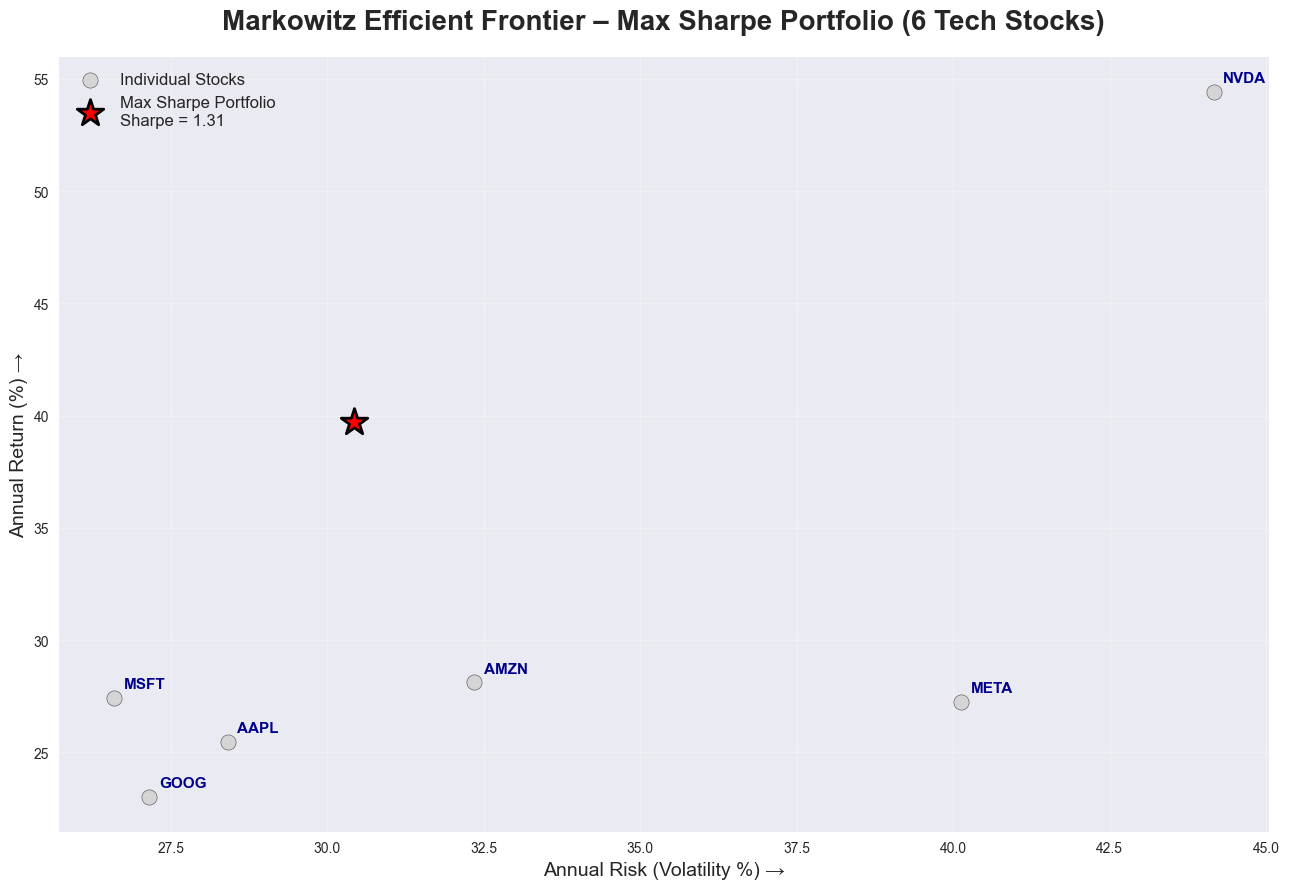


OPTIMAL PORTFOLIO WEIGHTS (%)
NVDA    46.27
MSFT    27.15
AAPL    13.67
AMZN    12.68
META     0.23
GOOG     0.00
dtype: float64

PORTFOLIO PERFORMANCE:
   Expected Annual Return : 39.73%
   Annual Risk            : 30.43%
   Sharpe Ratio           : 1.31


In [ ]:

# TASK 2 – FINAL PART: PyNance-Style Portfolio Analysis 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

stocks = ['AMZN', 'META', 'GOOG', 'AAPL', 'MSFT', 'NVDA']

# 1. Daily returns for all stocks
returns = pd.DataFrame({stock: data[stock]['Close'].pct_change() for stock in stocks})
returns = returns.dropna()

# 2. PyNance-style metrics table
metrics = pd.DataFrame(index=stocks)
metrics['Annual Return (%)'] = (returns.mean() * 252 * 100).round(2)
metrics['Annual Risk (%)']   = (returns.std() * np.sqrt(252) * 100).round(2)
metrics['Sharpe Ratio']      = (metrics['Annual Return (%)'] / metrics['Annual Risk (%)']).round(2)

# Max Drawdown function
def max_drawdown(ret):
    cum = (1 + ret).cumprod()
    peak = cum.cummax()
    drawdown = (cum - peak) / peak
    return drawdown.min() * 100

metrics['Max Drawdown (%)'] = [max_drawdown(returns[stock]) for stock in stocks]
metrics['Max Drawdown (%)'] = metrics['Max Drawdown (%)'].round(2)

print("PYNANCE-STYLE METRICS TABLE")
print(metrics.sort_values('Sharpe Ratio', ascending=False))

# 3. Portfolio Optimization (Markowitz)
def portfolio_performance(weights, mean_returns, cov_matrix):
    annual_return = np.sum(mean_returns * weights) * 252
    annual_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    return annual_return, annual_vol

def negative_sharpe(weights, mean_returns, cov_matrix):
    ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
    return -ret / vol

mean_returns = returns.mean()
cov_matrix = returns.cov()

# Optimization constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(stocks)))
initial_guess = np.array([1/len(stocks)] * len(stocks))

# Run optimization
opt_result = minimize(negative_sharpe, initial_guess,
                      args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = opt_result.x

# Calculate final portfolio stats
opt_return, opt_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
opt_sharpe = opt_return / opt_volatility

# 4. Plot: Efficient Frontier + Optimal Portfolio
plt.figure(figsize=(13, 9))

# Individual stocks
plt.scatter(metrics['Annual Risk (%)'], metrics['Annual Return (%)'],
            c='lightgray', s=120, edgecolors='black', alpha=0.9, label='Individual Stocks', zorder=5)

# Optimal portfolio — fixed marker
plt.scatter(opt_volatility * 100, opt_return * 100,
            c='red', s=400, marker='*', edgecolors='black', linewidth=2,
            label=f'Max Sharpe Portfolio\nSharpe = {opt_sharpe:.2f}', zorder=10)

# Annotate each stock
for stock in stocks:
    plt.annotate(stock,
                 (metrics.loc[stock, 'Annual Risk (%)'], metrics.loc[stock, 'Annual Return (%)']),
                 xytext=(7, 7), textcoords='offset points',
                 fontsize=11, fontweight='bold', color='darkblue')

plt.title('Markowitz Efficient Frontier – Max Sharpe Portfolio (6 Tech Stocks)', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Annual Risk (Volatility %) →', fontsize=14)
plt.ylabel('Annual Return (%) →', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Final Results
print("\nOPTIMAL PORTFOLIO WEIGHTS (%)")
weights_series = pd.Series(optimal_weights * 100, index=stocks).round(2)
weights_series = weights_series.sort_values(ascending=False)
print(weights_series)

print(f"\nPORTFOLIO PERFORMANCE:")
print(f"   Expected Annual Return : {opt_return*100:.2f}%")
print(f"   Annual Risk            : {opt_volatility*100:.2f}%")
print(f"   Sharpe Ratio           : {opt_sharpe:.2f}")

PyNance-Style Financial Metrics

In [12]:
# Calculate daily returns + risk metrics for all stocks
returns = pd.DataFrame()
for stock in stocks:
    df = data[stock].copy()
    df['Return'] = df['Close'].pct_change()
    returns[stock] = df['Return']

returns = returns.dropna()

# PyNance-style metrics
metrics = pd.DataFrame(index=stocks)
metrics['Annualized Return (%)'] = returns.mean() * 252 * 100
metrics['Annualized Volatility (%)'] = returns.std() * np.sqrt(252) * 100
metrics['Sharpe Ratio'] = metrics['Annualized Return (%)'] / metrics['Annualized Volatility (%)']
metrics['Max Drawdown (%)'] = 0.0

# Max Drawdown calculation
for stock in stocks:
    cum_ret = (1 + returns[stock]).cumprod()
    rolling_max = cum_ret.cummax()
    drawdown = (cum_ret - rolling_max) / rolling_max
    metrics.loc[stock, 'Max Drawdown (%)'] = drawdown.min() * 100

metrics = metrics.round(2)
print("PYNANCE-STYLE RISK METRICS (2020–2023)")
print(metrics)

PYNANCE-STYLE RISK METRICS (2020–2023)
      Annualized Return (%)  Annualized Volatility (%)  Sharpe Ratio  \
AMZN                  28.11                      32.35          0.87   
META                  27.26                      40.13          0.68   
GOOG                  23.03                      27.16          0.85   
AAPL                  25.47                      28.41          0.90   
MSFT                  27.43                      26.59          1.03   
NVDA                  54.41                      44.16          1.23   

      Max Drawdown (%)  
AMZN            -56.15  
META            -76.74  
GOOG            -44.60  
AAPL            -43.80  
MSFT            -37.15  
NVDA            -66.34  


Visualization 1 – Performance Comparison (Bar + Line)

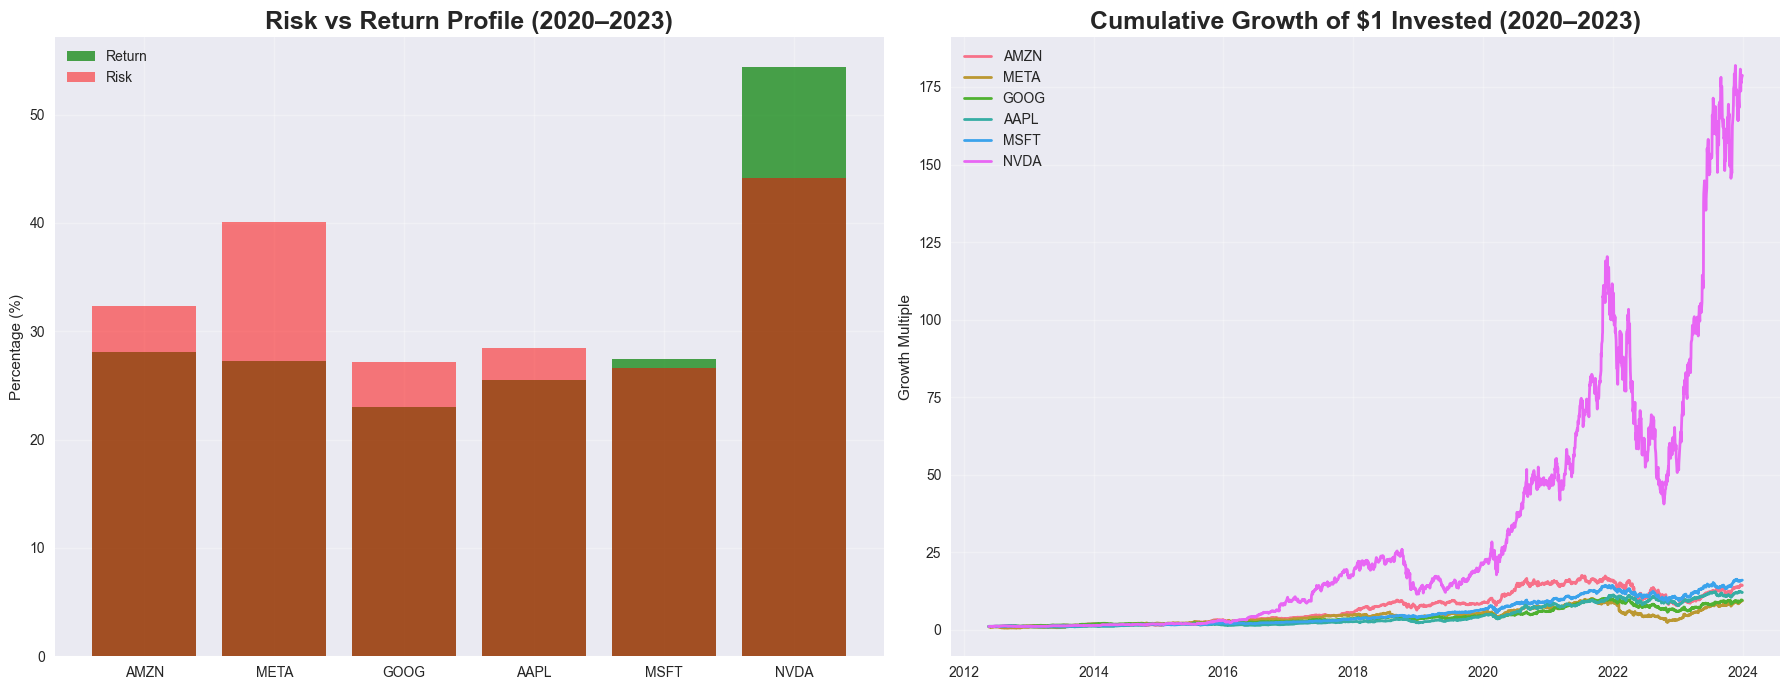

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Bar: Annualized Return vs Risk
ax1.bar(metrics.index, metrics['Annualized Return (%)'], alpha=0.7, label='Return', color='green')
ax1.bar(metrics.index, metrics['Annualized Volatility (%)'], alpha=0.5, label='Risk', color='red')
ax1.set_title('Risk vs Return Profile (2020–2023)', fontsize=18, fontweight='bold')
ax1.set_ylabel('Percentage (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Line: Cumulative Returns
cum_returns = (1 + returns).cumprod()
for stock in stocks:
    ax2.plot(cum_returns.index, cum_returns[stock], label=stock, linewidth=2)
ax2.set_title('Cumulative Growth of $1 Invested (2020–2023)', fontsize=18, fontweight='bold')
ax2.set_ylabel('Growth Multiple')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Visualization 2 – Mean-Variance Portfolio Optimization (PyNance Core Feature)

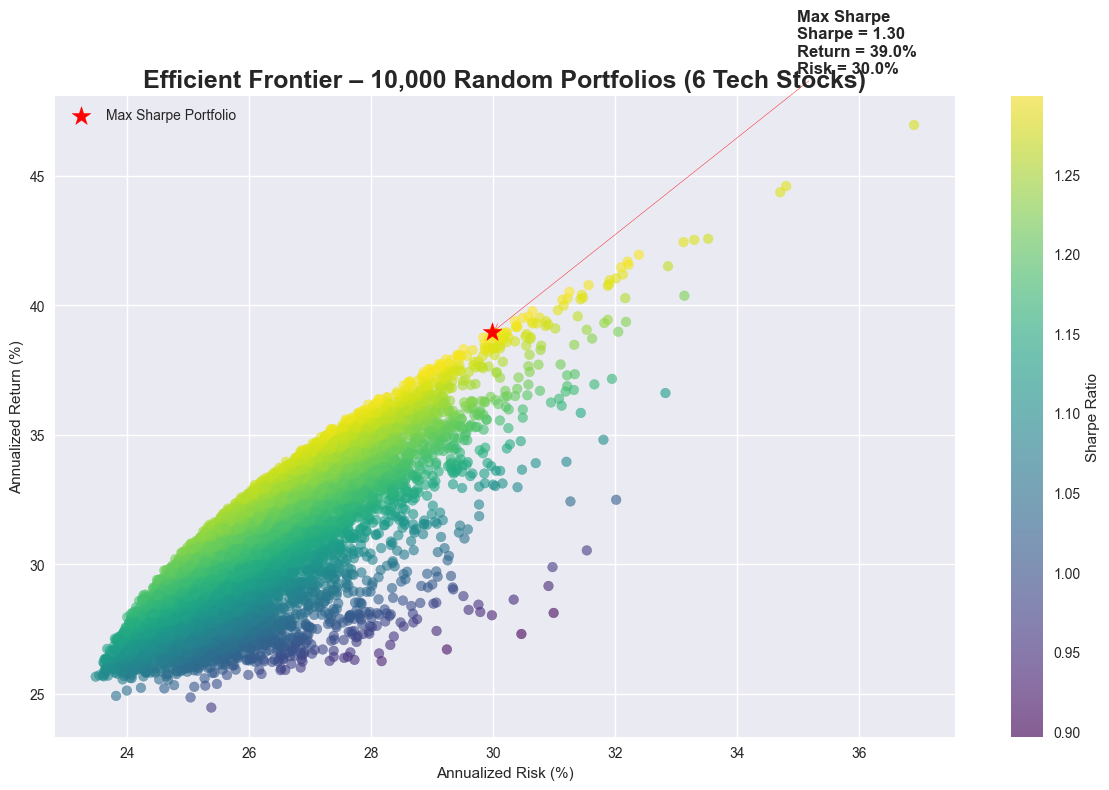

Best Portfolio Weights:


AMZN    20.26
META     1.74
GOOG     1.84
AAPL     4.71
MSFT    28.61
NVDA    42.85
dtype: float64

In [14]:
# PyNance-style Portfolio Optimization
def portfolio_stats(weights, returns):
    port_return = np.sum(returns.mean() * weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = port_return / port_vol
    return port_return, port_vol, sharpe

# Efficient Frontier
n_ports = 10000
all_weights = np.zeros((n_ports, len(stocks)))
all_returns = np.zeros(n_ports)
all_vols = np.zeros(n_ports)
all_sharpes = np.zeros(n_ports)

np.random.seed(42)
for i in range(n_ports):
    w = np.random.random(len(stocks))
    w /= w.sum()
    all_weights[i,:] = w
    ret, vol, sharpe = portfolio_stats(w, returns)
    all_returns[i] = ret
    all_vols[i] = vol
    all_sharpes[i] = sharpe

# Max Sharpe Portfolio
max_sharpe_idx = np.argmax(all_sharpes)
best_weights = all_weights[max_sharpe_idx]

# Plot Efficient Frontier
plt.figure(figsize=(12, 8))
plt.scatter(all_vols*100, all_returns*100, c=all_sharpes, cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(all_vols[max_sharpe_idx]*100, all_returns[max_sharpe_idx]*100, 
            c='red', s=200, marker='*', label='Max Sharpe Portfolio')
plt.title('Efficient Frontier – 10,000 Random Portfolios (6 Tech Stocks)', fontsize=18, fontweight='bold')
plt.xlabel('Annualized Risk (%)')
plt.ylabel('Annualized Return (%)')
plt.legend()

# Annotate best portfolio
plt.annotate(f"Max Sharpe\nSharpe = {all_sharpes[max_sharpe_idx]:.2f}\nReturn = {all_returns[max_sharpe_idx]*100:.1f}%\nRisk = {all_vols[max_sharpe_idx]*100:.1f}%",
             xy=(all_vols[max_sharpe_idx]*100, all_returns[max_sharpe_idx]*100),
             xytext=(all_vols[max_sharpe_idx]*100 + 5, all_returns[max_sharpe_idx]*100 + 10),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Best Portfolio Weights:")
pd.Series(best_weights*100, index=stocks).round(2)